<a href="https://colab.research.google.com/github/Najila-1234/k-means-clustering/blob/main/kmeans_clust_nlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# clustering using nlp
import pandas as pd
data=pd.read_csv("abcnews-date-text.csv",usecols=["headline_text"],nrows=2000)
data.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [ ]:
txt=data.headline_text
txt

0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
1995    former mayor speaks out over mismanagement rep...
1996    fraser shares lead as wind sweeps adelaide course
1997                   fuel prices tipped to jump further
1998            gardens in the sky wins comp for wtc site
1999        gas fired power station planned for illawarra
Name: headline_text, Length: 2000, dtype: object

In [ ]:
# remove special characters
txt=txt.str.replace('[^a-zA-Z0-9]+',' ')
txt

<ipython-input-17-dd381273d8d1>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  txt=txt.str.replace('[^a-zA-Z0-9]+',' ')


0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
1995    former mayor speaks out over mismanagement rep...
1996    fraser shares lead as wind sweeps adelaide course
1997                   fuel prices tipped to jump further
1998            gardens in the sky wins comp for wtc site
1999        gas fired power station planned for illawarra
Name: headline_text, Length: 2000, dtype: object

In [ ]:
# do stemmimg & tokenization
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
from nltk import word_tokenize
import nltk
nltk.download('punkt')
txt=txt.apply(lambda x:[stemmer.stem (i.lower()) for i in word_tokenize(x)]).apply(lambda x:' '.join(x))
txt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        aba decid against communiti broadcast licenc
1                  act fire wit must be awar of defam
2           a g call for infrastructur protect summit
3            air nz staff in aust strike for pay rise
4           air nz strike to affect australian travel
                            ...                      
1995      former mayor speak out over mismanag report
1996    fraser share lead as wind sweep adelaid cours
1997                   fuel price tip to jump further
1998          garden in the sky win comp for wtc site
1999        gas fire power station plan for illawarra
Name: headline_text, Length: 2000, dtype: object

In [ ]:
# remove stopwords
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop=stopwords.words('english')
txt=txt.apply(lambda x:[i for i in word_tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0             aba decid communiti broadcast licenc
1                     act fire wit must awar defam
2              g call infrastructur protect summit
3                air nz staff aust strike pay rise
4           air nz strike affect australian travel
                           ...                    
1995            former mayor speak mismanag report
1996    fraser share lead wind sweep adelaid cours
1997                           fuel price tip jump
1998                  garden sky win comp wtc site
1999         gas fire power station plan illawarra
Name: headline_text, Length: 2000, dtype: object

In [ ]:
txt=txt.apply(lambda x:[i for i in word_tokenize(x) if len(i)>=3]).apply(lambda x:' '.join(x))
txt

0             aba decid communiti broadcast licenc
1                     act fire wit must awar defam
2                call infrastructur protect summit
3                   air staff aust strike pay rise
4              air strike affect australian travel
                           ...                    
1995            former mayor speak mismanag report
1996    fraser share lead wind sweep adelaid cours
1997                           fuel price tip jump
1998                  garden sky win comp wtc site
1999         gas fire power station plan illawarra
Name: headline_text, Length: 2000, dtype: object

In [ ]:
# tfidf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data=vec.fit_transform(txt)
print(train_data)

  (0, 1636)	0.45052270497566393
  (0, 396)	0.45052270497566393
  (0, 628)	0.37822732136469134
  (0, 787)	0.4748698126729642
  (0, 39)	0.4748698126729642
  (1, 792)	0.4422403471643727
  (1, 237)	0.45987343319190777
  (1, 1848)	0.40793944948613436
  (1, 3097)	0.4422403471643727
  (1, 1102)	0.2938871353459671
  (1, 65)	0.3802356287294091
  (2, 2721)	0.5280129729902661
  (2, 2173)	0.48101380225441726
  (2, 1446)	0.5817589198429666
  (2, 454)	0.389081715810283
  (3, 2356)	0.37682493323398597
  (3, 2030)	0.4094817108819517
  (3, 2688)	0.43103188602909626
  (3, 223)	0.39681365010504616
  (3, 2645)	0.44497488109210637
  (3, 105)	0.3861029573312899
  (4, 2882)	0.47845590446948894
  (4, 226)	0.4582429228350424
  (4, 84)	0.4676250423523924
  (4, 2688)	0.4358678774814645
  :	:
  (1995, 1738)	0.44771872076897873
  (1995, 2302)	0.3642157719091091
  (1996, 702)	0.3976199711191794
  (1996, 2742)	0.41347394555178474
  (1996, 1158)	0.41347394555178474
  (1996, 2507)	0.36677990410215117
  (1996, 71)	0.35

In [ ]:
#kmeans clustering
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

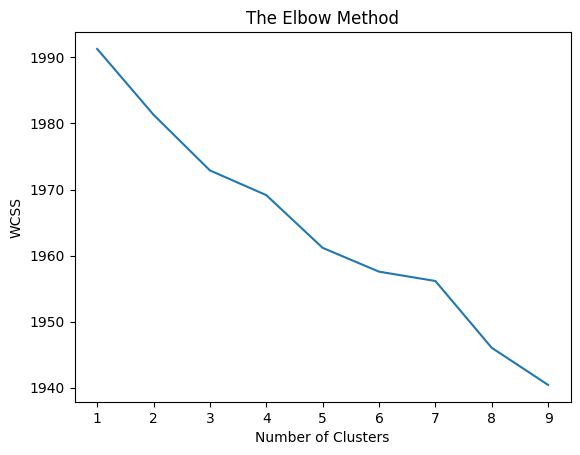

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
  kmeans.fit(train_data)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [ ]:
# create new model by take point 8(elbow point) from graph
kmeans=KMeans(n_clusters=8,init='k-means++',random_state=0)
y=kmeans.fit_predict(train_data)
y


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 4, 4, ..., 4, 4, 4], dtype=int32)

In [ ]:
# add new colum cluster to assign the cluster no
data['cluster']=y
data

,headline_text,cluster
0,aba decides against community broadcasting lic...,4
1,act fire witnesses must be aware of defamation,4
2,a g calls for infrastructure protection summit,4
3,air nz staff in aust strike for pay rise,4
4,air nz strike to affect australian travellers,4
...,...,...
1995,former mayor speaks out over mismanagement rep...,4
1996,fraser shares lead as wind sweeps adelaide course,4
1997,fuel prices tipped to jump further,4
1998,gardens in the sky wins comp for wtc site,4


In [ ]:
data['cluster'].value_counts()

4    1496
7     128
1      84
2      80
6      76
3      65
5      40
0      31
Name: cluster, dtype: int64